In [1]:
import pandas as pd
import dill
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
#working with text
from sklearn.feature_extraction.text import TfidfVectorizer
#normalizing data
from sklearn.preprocessing import StandardScaler
#pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import precision_score,recall_score
#imputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
import sklearn.datasets
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

pd.options.display.max_columns = 150
%matplotlib inline

### Анализ данных
Сборник SMS-спама - это набор SMS-сообщений с тегами, собранных для исследования SMS-спама. Он содержит один набор SMS-сообщений на английском языке из 5 574 сообщений, помеченных как «легитимные» или «спам».

файлы содержат по одному сообщению в строке. Каждая строка состоит из двух столбцов: v1 содержит метку (ветчина или спам), а v2 содержит необработанный текст.

Этот корпус был получен из бесплатных или бесплатных источников для исследований в Интернете:

-> Коллекция из 425 спам-сообщений SMS была вручную извлечена с веб-сайта Grumbletext. Это британский форум, на котором пользователи сотовых телефонов публично заявляют о спам-сообщениях в виде SMS, причем большинство из них не сообщает о полученном спаме. Идентификация текста спам-сообщений в претензиях - очень сложная и трудоемкая задача, требующая тщательного сканирования сотен веб-страниц. Веб-сайт Grumbletext: [Веб-ссылка] .
-> Подмножество из 3 375 SMS, случайно выбранных любительских сообщений из NUS SMS Corpus (NSC), который представляет собой набор данных из примерно 10 000 легитимных сообщений, собранных для исследований в Департаменте компьютерных наук Национального университета Сингапура. Сообщения в основном исходят от сингапурцев и в основном от студентов, обучающихся в университете. Эти сообщения были получены от добровольцев, которые были осведомлены о том, что их вклад станет общедоступным. Корпус NUS SMS доступен по адресу: [Web Link] .
-> Список из 450 радиолюбительских SMS-сообщений, собранных из докторской диссертации Кэролайн Тэг, доступен на [Web Link] .
-> Наконец, мы добавили корпус SMS Spam Corpus v.0.1 Big. Он содержит 1 002 любительских SMS-сообщения и 322 спам-сообщения, и он общедоступен по адресу: [Web Link] . Этот корпус использовался в следующих академических исследованиях:

In [2]:
df_ = pd.read_csv(r"C:\Users\nikita.saprykin\Desktop\Машинное обучение в бизнесе\new\spam.csv",  encoding='ISO-8859-1')
df_.head(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
df_.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,GE,2
Unnamed: 4,6,5,"GNT:-)""",2


In [4]:
df_.shape

(5572, 5)

#### Пропущенные значения

In [5]:
df_.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

<AxesSubplot:>

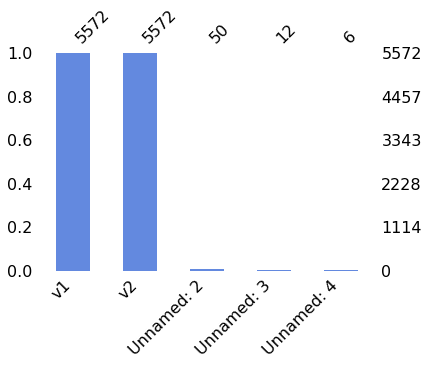

In [6]:
import missingno as msno
msno.bar(df_, color = '#6389df', figsize = (6,4))  

In [7]:
df_ = df_[['v2','v1']]
df_.columns = ['sms','spam']
df=pd.DataFrame()
mapping = {'spam': 1,'ham': 0}
df['sms']=df_['sms']
df['spam']=df_['spam'].map(mapping)

df.head(5)

,sms,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


Распределение возраста сотрудников

### Очистка данных

In [8]:
def remove_duplicate(data):
    
    print("До удаления дубликатов кол-во строк = ",df.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("После удаления дубликатов кол-во строк = ",df.shape[0])
    return "Проверка дубликатов"

remove_duplicate(df)


До удаления дубликатов кол-во строк =  5572
После удаления дубликатов кол-во строк =  5169


'Проверка дубликатов'

Пропущенные значения

In [9]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
spam,0,0.0
sms,0,0.0


In [10]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
spam,0,0.0
sms,0,0.0


### Test train split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    df['spam'], test_size=0.33, random_state=42)
#save test
X_test.to_csv("X_test.csv", index=None)
y_test.to_csv("y_test.csv", index=None)
#save train
X_train.to_csv("X_train.csv", index=None)
y_train.to_csv("y_train.csv", index=None)

In [12]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class TextImputer(BaseEstimator, TransformerMixin):
    def __init__(self, key, value):
        self.key = key
        self.value = value
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X[self.key] = X[self.key].fillna(self.value)
        return X

In [13]:
features = df['sms']
target = df['spam']

In [14]:
#combine
sms = Pipeline([
                ('imputer', TextImputer('sms', '')),
                ('selector', ColumnSelector(key='sms')),
                ('tfidf', TfidfVectorizer(max_df=0.9, min_df=10))
            ])

feats = FeatureUnion([('sms', sms),
                      ])

In [15]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', LogisticRegression()),
])

pipeline.fit(X_train, y_train)
#Посмотрим, как выглядит наш pipeline
pipeline.steps

<ipython-input-12-803d89350675>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[self.key] = X[self.key].fillna(self.value)


[('features',
  FeatureUnion(transformer_list=[('sms',
                                  Pipeline(steps=[('imputer',
                                                   TextImputer(key='sms',
                                                               value='')),
                                                  ('selector',
                                                   ColumnSelector(key='sms')),
                                                  ('tfidf',
                                                   TfidfVectorizer(max_df=0.9,
                                                                   min_df=10))]))])),
 ('classifier', LogisticRegression())]

In [16]:
with open("pipeline.dill", "wb") as f:
    dill.dump(pipeline, f)

### Проверка работоспособности и качества пайплайна


In [17]:
import pandas as pd
from sklearn.metrics import roc_auc_score,roc_curve
import dill
dill._dill._reverse_typemap['ClassType'] = type

In [18]:
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

In [19]:
with open('pipeline.dill', 'rb') as in_strm:
#with open('"app/models/my_1st_pipeline.dill"', 'rb') as in_strm:
    pipeline = dill.load(in_strm)
    
predictions = pipeline.predict_proba(X_test)
pd.DataFrame({'preds': predictions[:, 1]}).to_csv("test_predictions.csv", index=None)

In [23]:
X_test[['sms']].head(1)

,sms
0,Did u download the fring app?


In [34]:
predictions = pipeline.predict_proba(X_test.iloc[:1000])
pd.DataFrame({'preds': predictions[:, 1]}).to_csv("test_predictions.csv", index=None)

<ipython-input-12-803d89350675>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[self.key] = X[self.key].fillna(self.value)


In [35]:
roc_auc_score(y_score=predictions[:, 1][:], y_true=y_test.iloc[:1000])

0.9957246235721702